# IT Academy - Data Science with Python
## Sprint 6: Sampling Methods
### [Github Sampling Methods](https://github.com/jesussantana/Sampling)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Sampling.svg)](https://wakatime.com/badge/github/jesussantana/Sampling)

## Create Project Structure

In [1]:
# pip install cookiecutter
# cookiecutter -c v1 https://github.com/jesussantana/cookiecutter-data-science

In [2]:
from IPython.display import Image

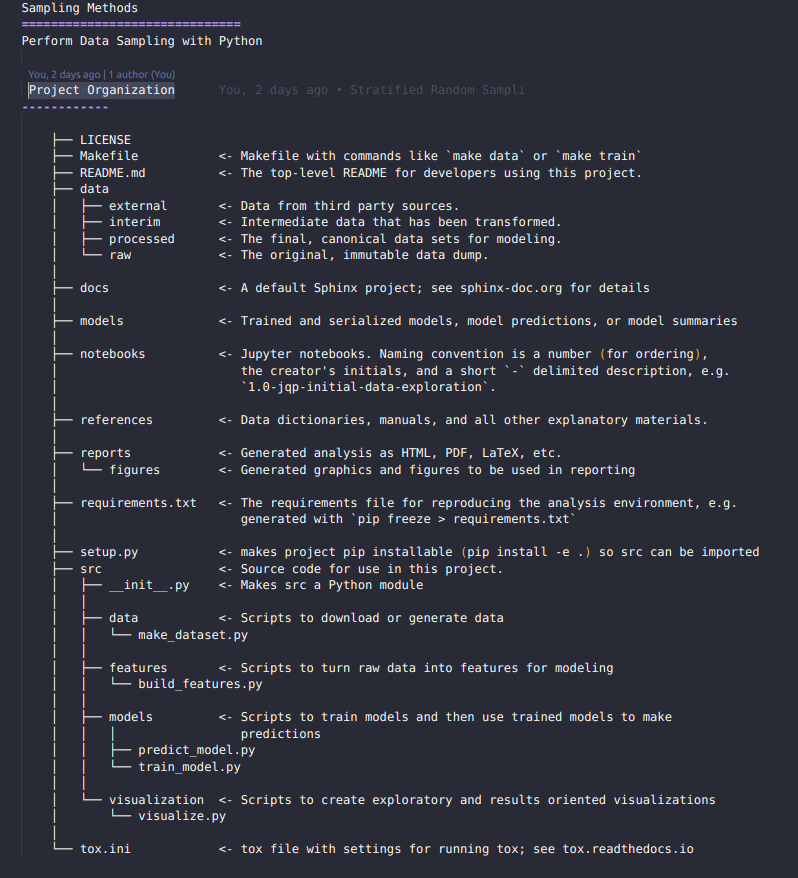

In [3]:
Image("../reports/figures/Project_Organization.png")

### Exercise 1:  

  - Grab a sports-themed dataset you like. Performs a sampling of the data generating a simple random sample and a systematic sample.

In [4]:
import pandas as pd 
import numpy as np
import random as rd
import warnings
from numpy import where

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')

In [5]:
pd.set_option('display.max_columns', None)

path = '../data/'
file = 'raw/MLB.txt'

df_raw= pd.read_table(path+file)

df = df_raw.copy()

df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [6]:
df.tail()

,player,team,position,salary
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0
824,Ian Desmond,Washington Nationals,Shortstop,400.0
825,Ross Detwiler,Washington Nationals,Pitcher,400.0
826,Jesse English,Washington Nationals,Pitcher,400.0
827,Willy Taveras,Washington Nationals,Outfielder,400.0


In [7]:
df.describe().round(2)

,salary
count,828.00
mean,3281.83
std,4465.45
min,400.00
25%,418.32
50%,1093.75
75%,4250.00
max,33000.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [9]:
df.shape

(828, 4)

In [10]:
df.columns

Index(['player', 'team', 'position', 'salary'], dtype='object')

In [11]:
# Store the real mean
real_mean = round(df.salary.mean(),3)
real_mean

3281.828

In [12]:
df

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0
...,...,...,...,...
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0
824,Ian Desmond,Washington Nationals,Shortstop,400.0
825,Ross Detwiler,Washington Nationals,Pitcher,400.0
826,Jesse English,Washington Nationals,Pitcher,400.0


### Simple Random Sample

In [13]:
simple_random_sample = df.sample(frac=0.1, replace=True, random_state=6858)

In [14]:
simple_random_sample.head()

,player,team,position,salary
566,Carlos Ruiz,Philadelphia Phillies,Catcher,1900.0
580,Zach Duke,Pittsburgh Pirates,Pitcher,4300.0
77,Craig Tatum,Baltimore Orioles,Catcher,400.0
327,Jose Guillen,Kansas City Royals,Outfielder,12000.0
581,Ryan Doumit,Pittsburgh Pirates,Catcher,3650.0


In [15]:
simple_random_sample.shape

(83, 4)

In [16]:
simple_random_mean = round(simple_random_sample.salary.mean(),3)
simple_random_mean

3621.331

In [17]:
real_mean

3281.828

In [18]:
abs(simple_random_sample.salary.mean()-df.salary.mean())/simple_random_sample.salary.mean()*100

9.375069863282267

In [19]:
simple_random_sample.position.value_counts(normalize=True)

Pitcher           0.542169
Outfielder        0.204819
Shortstop         0.084337
Catcher           0.060241
Second Baseman    0.060241
Third Baseman     0.024096
First Baseman     0.024096
Name: position, dtype: float64

In [20]:
df.position.value_counts(normalize=True)

Pitcher              0.495169
Outfielder           0.178744
Catcher              0.080918
Shortstop            0.067633
Second Baseman       0.057971
Third Baseman        0.055556
First Baseman        0.050725
Designated Hitter    0.008454
Infielder            0.004831
Name: position, dtype: float64

In [21]:
simple_random_sample.to_csv('../data/interim/simple_random_sample.csv')

### Systematic Sampling

In [22]:
# Define systematic sampling function
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    
    return systematic_sample

In [23]:
# Obtain a systematic sample
systematic_sample = systematic_sampling(df, 10)

In [24]:
# Save the sample mean
systematic_mean = round(systematic_sample.salary.mean(),3)
systematic_mean

3499.42

In [25]:
real_mean

3281.828

In [26]:
systematic_sample

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
10,Aaron Heilman,Arizona Diamondbacks,Pitcher,2150.0
20,Tony Abreu,Arizona Diamondbacks,Shortstop,407.0
30,Billy Wagner,Atlanta Braves,Pitcher,6750.0
40,Eric Hinske,Atlanta Braves,First Baseman,1000.0
...,...,...,...,...
780,Shawn Camp,Toronto Blue Jays,Pitcher,1150.0
790,Brandon Morrow,Toronto Blue Jays,Pitcher,409.8
800,Jason Marquis,Washington Nationals,Pitcher,7500.0
810,Sean Burnett,Washington Nationals,Pitcher,775.0


In [27]:
systematic_sample.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
10,Aaron Heilman,Arizona Diamondbacks,Pitcher,2150.0
20,Tony Abreu,Arizona Diamondbacks,Shortstop,407.0
30,Billy Wagner,Atlanta Braves,Pitcher,6750.0
40,Eric Hinske,Atlanta Braves,First Baseman,1000.0


In [28]:
systematic_sample.to_csv('../data/interim/systematic_sample.csv')

### Cluster Sampling

In [29]:
def cluster_sampling(df, number_of_clusters):
    
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters)

        # Create an empty list
        indexes = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%2 == 0:
                indexes.append(i)
        cluster_sample = df.iloc[indexes]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")

In [30]:
# Obtain a cluster sample
cluster_sample = cluster_sampling(df, 6)

In [31]:
# Save the sample mean
cluster_mean = round(cluster_sample.salary.mean(),2)
cluster_mean

3135.24

In [32]:
real_mean

3281.828

In [33]:
cluster_sample

,player,team,position,salary,cluster_id
138,Alex Rios,Chicago White Sox,Outfielder,10200.0,2
139,Bobby Jenks,Chicago White Sox,Pitcher,7500.0,2
140,Juan Pierre,Chicago White Sox,Outfielder,7000.0,2
141,A.J. Pierzynski,Chicago White Sox,Catcher,6750.0,2
142,Scott Linebrink,Chicago White Sox,Pitcher,5000.0,2
...,...,...,...,...,...
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0,6
824,Ian Desmond,Washington Nationals,Shortstop,400.0,6
825,Ross Detwiler,Washington Nationals,Pitcher,400.0,6
826,Jesse English,Washington Nationals,Pitcher,400.0,6


In [34]:
cluster_sample.shape

(414, 5)

In [35]:
cluster_sample.to_csv('../data/interim/cluster_sample.csv')

### Exercise 2: 
  - It continues with the sports theme data set and generates a stratified sample and a sample using SMOTE (Synthetic Minority Oversampling Technique).

### Stratified Random Sampling

In [36]:
# Set the split criteria
split = StratifiedShuffleSplit(n_splits=1, test_size=100)

In [37]:
# Perform data frame split
for x, y in split.split(df, df.position):
    stratified_random_sample = df.iloc[y]

In [38]:
type(stratified_random_sample)

pandas.core.frame.DataFrame

In [39]:
stratified_random_sample

,player,team,position,salary,cluster_id
464,Alex Burnett,Minnesota Twins,Pitcher,400.000,4
339,Willie Bloomquist,Kansas City Royals,Second Baseman,1700.000,3
703,Colby Rasmus,St. Louis Cardinals,Outfielder,418.000,6
790,Brandon Morrow,Toronto Blue Jays,Pitcher,409.800,6
782,Shaun Marcum,Toronto Blue Jays,Pitcher,850.000,6
...,...,...,...,...,...
383,Hiroki Kuroda,Los Angeles Dodgers,Pitcher,15433.333,3
358,Hideki Matsui,Los Angeles Angeles,Outfielder,6000.000,3
324,Chris D. Johnson,Houston Astros,Third Baseman,400.000,3
701,Kyle McClellan,St. Louis Cardinals,Pitcher,425.000,6


In [40]:
stratified_random_sample.groupby('position').mean()

,salary,cluster_id
position,,
Catcher,3084.375000,3.625000
Designated Hitter,4100.000000,4.000000
First Baseman,7935.000000,4.200000
Outfielder,2228.911111,3.388889
Pitcher,2856.248959,3.836735
Second Baseman,1627.083333,3.833333
Shortstop,2969.214286,3.285714
Third Baseman,5888.833333,2.166667


In [41]:
stratified_random_sample.describe().round()


,salary,cluster_id
count,100.0,100.0
mean,3144.0,4.0
std,4409.0,2.0
min,400.0,1.0
25%,420.0,2.0
50%,1000.0,4.0
75%,3812.0,5.0
max,19000.0,6.0


In [42]:
stratified_random_sample.position.unique()

array(['Pitcher', 'Second Baseman', 'Outfielder', 'Catcher',
       'First Baseman', 'Shortstop', 'Third Baseman', 'Designated Hitter'],
      dtype=object)

In [43]:
stratified_random_sample.shape

(100, 5)

In [44]:
stratified_mean = round(stratified_random_sample.salary.mean())
stratified_mean

3144

In [45]:
real_mean

3281.828

In [46]:
abs(stratified_random_sample.salary.mean()-df.salary.mean())/stratified_random_sample.salary.mean()*100


4.381662147364175

In [47]:
stratified_random_sample.position.value_counts(normalize=True)

Pitcher              0.49
Outfielder           0.18
Catcher              0.08
Shortstop            0.07
Third Baseman        0.06
Second Baseman       0.06
First Baseman        0.05
Designated Hitter    0.01
Name: position, dtype: float64

In [48]:
stratified_random_sample.to_csv('../data/interim/stratified_random_sample.csv')

### SMOTE (Synthetic Minority Oversampling Technique)

In [49]:
# oversample
oversample = SMOTE(sampling_strategy='not majority', k_neighbors=3, random_state=6858)

In [50]:
player_over, position_over = oversample.fit_resample(df[['salary']], df[['position']])

In [51]:
position_over.value_counts()

position         
Catcher              410
Designated Hitter    410
First Baseman        410
Infielder            410
Outfielder           410
Pitcher              410
Second Baseman       410
Shortstop            410
Third Baseman        410
dtype: int64

In [52]:
player_over['position'] = position_over

In [53]:
stratified_SMOTE=(player_over.groupby('position').apply(lambda x: x.sample(n=100, random_state=6858)).reset_index(level=0, drop=True))

In [54]:
abs(stratified_SMOTE.salary.mean()-real_mean) / stratified_SMOTE.salary.mean()*100

0.8386615543679796

In [55]:
stratified_SMOTE.position.value_counts(normalize=True)

First Baseman        0.111111
Shortstop            0.111111
Third Baseman        0.111111
Designated Hitter    0.111111
Pitcher              0.111111
Outfielder           0.111111
Catcher              0.111111
Second Baseman       0.111111
Infielder            0.111111
Name: position, dtype: float64

In [56]:
stratified_SMOTE.to_csv('../data/interim/stratified_SMOTE.csv')

### Exercise 3: 
  - It continues with the sports theme dataset and generates a sample using the Reservoir sampling method.

### Reservoir Sampling Method

In [57]:
def reservoir_sampling(sample, population):
    reservoir = []

    for i in range(population):

        if i < sample:
            reservoir.append(i)

        else:
            j = rd.randint(0, i)
            if j < sample:
                reservoir[j] = i

    return reservoir

In [58]:
sample = int(len(df)*0.1)+1
population = len(df)
reservoir_sample_index = reservoir_sampling(sample, population)

In [59]:
population

828

In [60]:
sample

83

In [61]:
print(reservoir_sample_index)

[715, 110, 776, 739, 502, 660, 379, 285, 554, 643, 10, 323, 182, 314, 631, 283, 16, 101, 179, 800, 420, 203, 393, 23, 675, 563, 349, 558, 520, 652, 461, 477, 462, 374, 324, 611, 457, 270, 824, 294, 478, 205, 185, 289, 576, 45, 120, 564, 785, 49, 376, 51, 260, 216, 220, 750, 443, 166, 204, 676, 585, 638, 408, 244, 394, 211, 248, 623, 433, 544, 640, 172, 265, 335, 346, 814, 697, 99, 78, 440, 732, 735, 530]


In [62]:
reservoir_sample = df.iloc[reservoir_sample_index]

In [63]:
reservoir_mean = round(reservoir_sample.salary.mean())
reservoir_mean

3090

In [64]:
real_mean

3281.828

In [65]:
reservoir_sample.to_csv('../data/interim/reservoir_sample.csv')

## Data Summary

In [66]:
# Create a dictionary with the mean outcomes
outcomes = {'sample_mean':[simple_random_mean, systematic_mean, stratified_mean, cluster_mean, reservoir_mean ],'real_mean':real_mean}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Stratified Sampling','Cluster Sampling', 'Reservoir Sampling'])

# Add a value corresponding to the absolute error
outcomes['abs_error'] = abs(outcomes['real_mean'] - outcomes['sample_mean'])

# Sort data frame by absolute error
outcomes.sort_values(by='abs_error')

,sample_mean,real_mean,abs_error
Stratified Sampling,3144.000,3281.828,137.828
Cluster Sampling,3135.240,3281.828,146.588
Reservoir Sampling,3090.000,3281.828,191.828
Systematic Sampling,3499.420,3281.828,217.592
Simple Random Sampling,3621.331,3281.828,339.503


In [67]:
outcomes.to_csv('../data/processed/outcomes.csv')

Text(0.5, 0, 'Reservoir - Salary (millions of dollars) - ReservoirSample k=83')

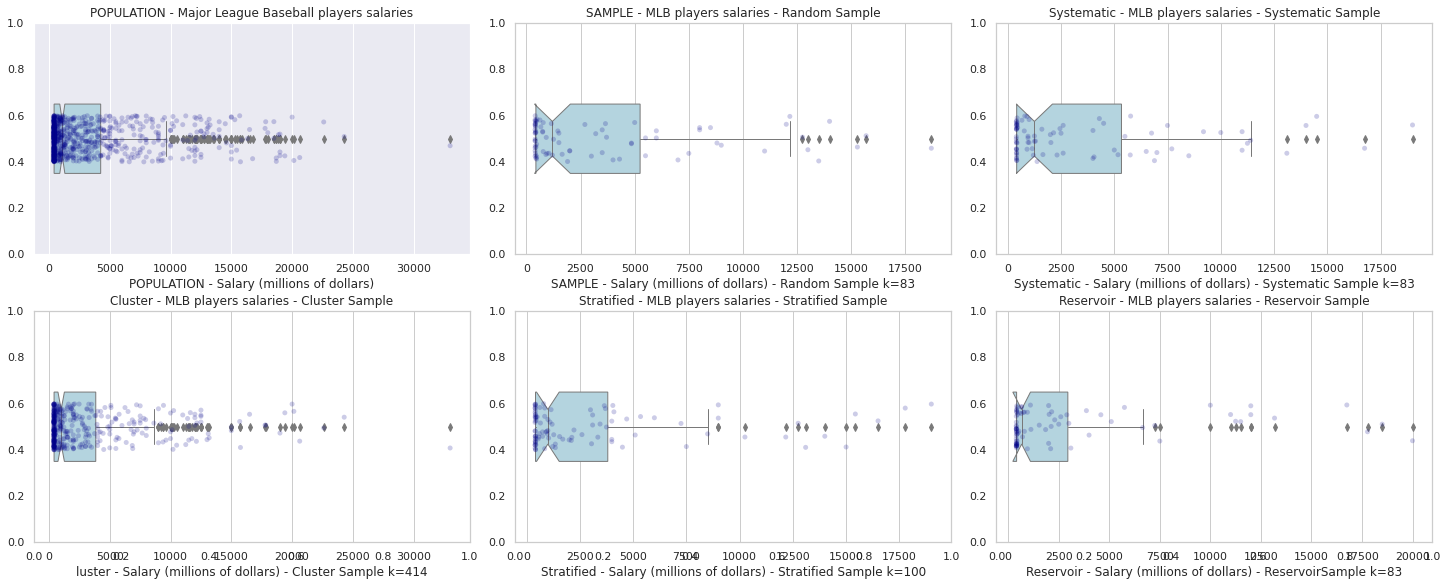

In [68]:
plt.rcParams['figure.constrained_layout.use'] = True
fig, axes = plt.subplots(2, 3, constrained_layout=True, sharex=True, figsize=(20,8))
#fig.tight_layout()
#fig= plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.9)

ax1 = fig.add_subplot(2, 3, 1)
# Plot
sns.set(style="whitegrid")
ax1 = sns.boxplot(x=df.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax1 = sns.stripplot(x=df.salary, orient='v', color='darkblue', alpha=0.2)
plt.title('POPULATION - Major League Baseball players salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

ax2 = fig.add_subplot(2, 3, 2)
# Plot
sns.set(style="whitegrid")
ax2 = sns.boxplot(x=simple_random_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax2 = sns.stripplot(x=simple_random_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'SAMPLE - MLB players salaries - Random Sample')
plt.xlabel(f'SAMPLE - Salary (millions of dollars) - Random Sample k={len(simple_random_sample)}')

ax3 = fig.add_subplot(2, 3, 3)
# Plot
sns.set(style="whitegrid")
ax3 = sns.boxplot(x=systematic_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax3 = sns.stripplot(x=systematic_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'Systematic - MLB players salaries - Systematic Sample')
plt.xlabel(f'Systematic - Salary (millions of dollars) - Systematic Sample k={len(systematic_sample)}')

ax4 = fig.add_subplot(2, 3, 4)
# Plot
sns.set(style="whitegrid")
ax4 = sns.boxplot(x=cluster_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax4 = sns.stripplot(x=cluster_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'Cluster - MLB players salaries - Cluster Sample')
plt.xlabel(f'luster - Salary (millions of dollars) - Cluster Sample k={len(cluster_sample)}')

ax5 = fig.add_subplot(2, 3, 5)
# Plot
sns.set(style="whitegrid")
ax5 = sns.boxplot(x=stratified_random_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax5 = sns.stripplot(x=stratified_random_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'Stratified - MLB players salaries - Stratified Sample')
plt.xlabel(f'Stratified - Salary (millions of dollars) - Stratified Sample k={len(stratified_random_sample)}')

ax6 = fig.add_subplot(2, 3, 6)
# Plot
sns.set(style="whitegrid")
ax6 = sns.boxplot(x=reservoir_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax6 = sns.stripplot(x=reservoir_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'Reservoir - MLB players salaries - Reservoir Sample')
plt.xlabel(f'Reservoir - Salary (millions of dollars) - ReservoirSample k={len(reservoir_sample)}')

In [69]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Population - MLB players',f'Random Sample k={len(simple_random_sample)}', f'Systematic Sample k={len(systematic_sample)}', f'Cluster Sample k={len(cluster_sample)}', f'Stratified Sample k={len(stratified_random_sample)}', f'Reservoir Sample k={len(reservoir_sample)}' ))

fig.add_trace(go.Violin(x=df.salary),row=1, col=1)

fig.add_trace(go.Violin(x=simple_random_sample.salary),row=1, col=2)

fig.add_trace(go.Violin(x=systematic_sample.salary),row=1, col=3)

fig.add_trace(go.Violin(x=cluster_sample.salary),row=2, col=1)

fig.add_trace(go.Violin(x=stratified_random_sample.salary),row=2, col=2)

fig.add_trace(go.Violin(x=reservoir_sample.salary),row=2, col=3)

fig.update_layout(height=500, width=1200,
                  title_text="Major League Baseball players salaries")

fig.show()

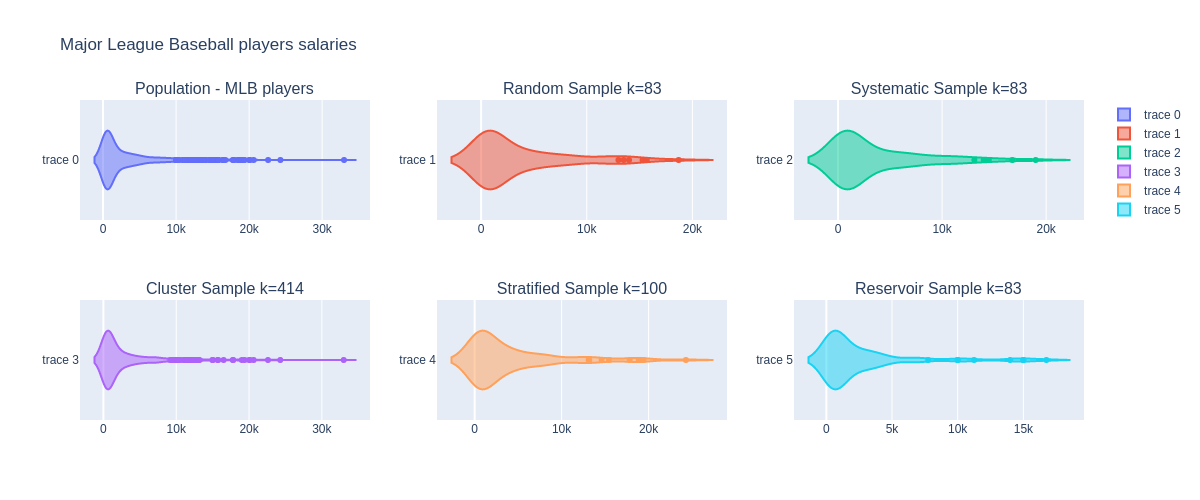

In [70]:
Image("../reports/figures/Major_League_Baseball_players_salaries.png")